In [1]:
pip install minisom

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io

c:\Users\Lenovo\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


In [3]:
# Function to initialize SOM weights
def initialize_weights(input_shape, output_shape):
    return np.random.rand(output_shape[0], output_shape[1], input_shape[2])

In [4]:
# Function to calculate the distance between the input vector and the SOM weights
def calculate_distance(input_vector, weights):
    return np.linalg.norm(input_vector - weights, axis=2)

In [5]:
# Function to find the winning unit index (the unit with the closest weight)
def find_winner_unit_in_image(input_vector, weights):
    distances = calculate_distance(input_vector, weights)
    return np.unravel_index(np.argmin(distances), distances.shape)

In [6]:
# Function to update SOM weights
def update_weights(input_vector, weights, winner, learning_rate, neighborhood_radius):
    distances = np.linalg.norm(np.indices(weights.shape[:2]).T - np.array(winner).reshape(1, -1), axis=2)
    influence = np.exp(-distances / (2 * neighborhood_radius**2))
    weights += learning_rate * influence[:, :, np.newaxis] * (input_vector - weights)

In [7]:
# Function to train SOM
def train_som(image, num_epochs, initial_learning_rate, initial_neighborhood_radius):
     input_shape = image. shape
     som_shape = (10, 10, input_shape[2]) # SOM size according to the number of color channels
     weights = initialize_weights(input_shape, som_shape)

     for epochs in range(num_epochs):
         # Update learning parameters and neighbor radius
         learning_rate = initial_learning_rate * np.exp(-epoch / num_epochs)
         neighborhood_radius = initial_neighborhood_radius * np.exp(-epoch / num_epochs)
         # SOM processing
         for i in range(input_shape[0]):
             for j in range(input_shape[1]):
                 input_vector = image[i, j, :]
                 winner = find_winner_unit_in_image(input_vector, weights)
                 update_weights(input_vector, weights, winner, learning_rate, neighborhood_radius)

     return weights

In [8]:
# Load Lenna image (you can replace this with another image if needed)
Lenna_path = "../img/Lenna.png"
Lenna = io.imread(Lenna_path) / 255.0 # Normalize pixel intensity to range [0, 1]

In [9]:
# SOM Training
num_epochs = 100
initial_learning_rate = 0.1
initial_neighborhood_radius = 5
trained_weights = train_som(Lenna, num_epochs, initial_learning_rate, initial_neighborhood_radius)

NameError: name 'epoch' is not defined

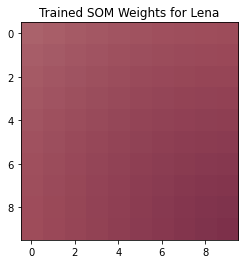

In [ ]:
# Visualization of SOM weights
plt.imshow(trained_weights)
plt.title('Trained SOM Weights for Lena')
plt.show()